In [12]:
import pandas as pd

In [19]:
X = pd.read_csv('./X_data.csv')
y= pd.read_csv('./y_data.csv')

In [20]:
X.shape

(825, 13)

In [21]:

X.drop(columns=['Unnamed: 0'], inplace=True)
X.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic,Diastolic
0,49,6.0,6,90,8,75,1,0,0,1,140,95
1,52,6.5,6,45,7,72,0,0,0,1,130,85
2,43,7.8,8,90,5,70,1,0,0,0,130,85
3,44,6.5,7,45,7,72,1,0,0,1,130,85
4,35,7.6,7,75,4,70,1,0,0,0,120,80


In [22]:
y.shape

(825, 2)

In [23]:
y.drop(columns=['Unnamed: 0'], inplace=True)
import numpy as np
y = np.ravel(y)

In [24]:
y.shape

(825,)

# Model Selection

DTree: 0.877576 (0.016442)
RF: 0.888485 (0.023189)
KNN: 0.878788 (0.010842)
NB: 0.889697 (0.011752)
SVM: 0.745455 (0.063795)


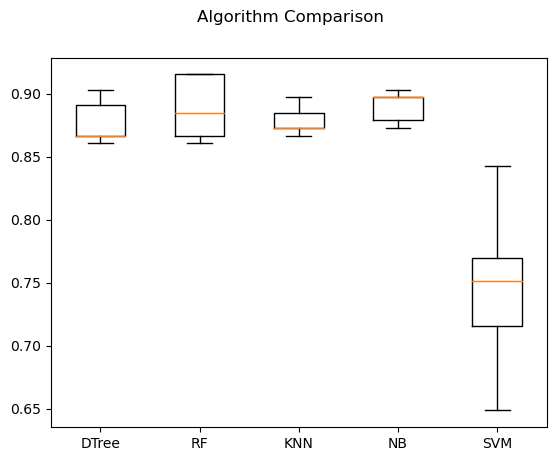

In [25]:
# Compare Algorithms
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
seed = 7
# prepare models
models = []
models.append(('DTree', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=5)
 cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier()

In [27]:
param_grid = {
'bootstrap': [True],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
'max_features': ['sqrt', 'log2'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 8, 13],
'n_estimators': [50, 100, 200, 400, 600, 800, 1000]
}

In [28]:
tuner = RandomizedSearchCV(estimator=classifier,
                           param_distributions=param_grid,
                           n_jobs=-1,
                           cv=5,
                           n_iter=100,
                           verbose=2,
                           scoring='accuracy')

### Train Test Split


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
X

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic,Diastolic
0,49,6.0,6,90,8,75,1,0,0,1,140,95
1,52,6.5,6,45,7,72,0,0,0,1,130,85
2,43,7.8,8,90,5,70,1,0,0,0,130,85
3,44,6.5,7,45,7,72,1,0,0,1,130,85
4,35,7.6,7,75,4,70,1,0,0,0,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...
820,59,8.1,9,75,3,68,0,0,0,1,140,95
821,59,8.0,9,75,3,68,0,0,0,1,140,95
822,59,8.1,9,75,3,68,0,0,0,1,140,95
823,59,8.1,9,75,3,68,0,0,0,1,140,95


In [31]:
x_train

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic,Diastolic
756,50,6.1,6,90,8,75,0,0,0,1,140,95
319,39,7.2,8,60,5,68,1,0,0,0,130,85
694,44,6.6,7,45,4,65,0,0,0,1,135,90
308,43,7.8,8,30,5,70,1,0,0,0,130,85
15,28,6.0,6,30,8,72,1,0,0,0,125,80
...,...,...,...,...,...,...,...,...,...,...,...,...
590,37,7.5,8,60,4,70,0,1,0,0,120,80
574,37,7.8,8,70,4,68,1,1,0,0,120,80
544,33,6.0,6,30,8,72,1,0,0,0,125,80
229,31,7.7,7,75,6,70,1,0,0,0,120,80


Finding the Best Hyper Parameters

In [32]:
tuner.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=13, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=13, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=13, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;

[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=13, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=13, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_fea

[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=13, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=2, min_samples_split=13, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=13, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_fe

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8, 13],
                                        'n_estimators': [50, 100, 200, 400, 600,
                                                         800, 1000]},
                   scoring='accuracy', verbose=2)

In [33]:
tuner.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [34]:
tuner.best_score_

0.9028785607196402

# Model Development with the Hyperparameteres

In [35]:
rf = RandomForestClassifier(n_estimators= 200,
                                  min_samples_split = 5,
                                  min_samples_leaf = 1,
                                  max_features = 'sqrt',
                                  max_depth = 70,
                                  bootstrap = True)

In [36]:
model_1 = rf.fit(x_train, y_train)

Metrics

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

y_pred = model_1.predict(x_test)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
prec = precision_score(y_true=y_test, y_pred=y_pred, average='micro')
recall = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
cm_dis = ConfusionMatrixDisplay(cm)

In [38]:
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test, y_pred=y_pred)


In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.92      0.94      0.93       141
           2       0.91      0.89      0.90        57

    accuracy                           0.90       248
   macro avg       0.89      0.88      0.89       248
weighted avg       0.90      0.90      0.90       248



0.9032258064516129
0.9032258064516129
0.9032258064516129


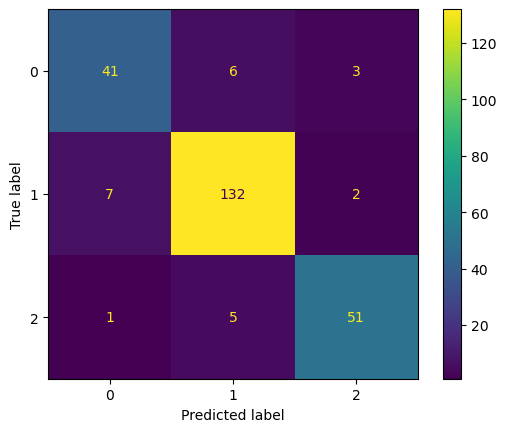

In [40]:
print(acc)
print(prec)
print(recall)
cm_dis.plot()

In [41]:
# pip install scikit-plot

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

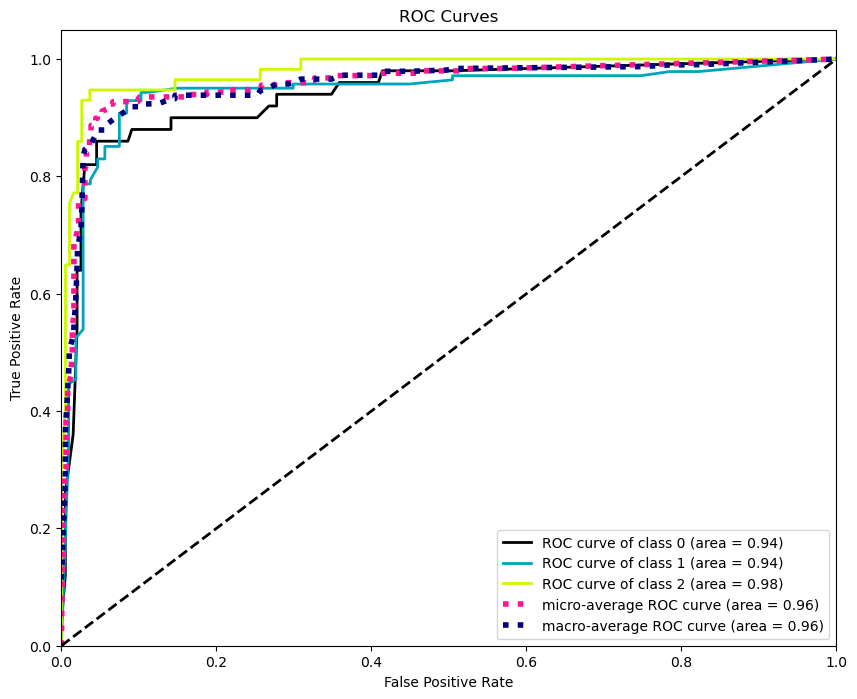

In [42]:
import scikitplot as skplt
y_probas=model_1.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [43]:
# from sklearn.metrics import roc_auc_score
# probs = y_probas[:, 1]
# print ('ROC AUC =', roc_auc_score(y_test, probs, multi_class='ovr'))

## Evidently AI - Not Working as expected

In [44]:
# pip install evidently

In [140]:
ref = pd.read_csv('./reference.csv')
cur = pd.read_csv('./dataset_preprocessed.csv')

In [141]:
cur

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Sleep Disorder,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic,Diastolic
0,49,6.0,6,90,8,75,2,1,0,0,1,140,95
1,52,6.5,6,45,7,72,2,0,0,0,1,130,85
2,43,7.8,8,90,5,70,1,1,0,0,0,130,85
3,44,6.5,7,45,7,72,0,1,0,0,1,130,85
4,35,7.6,7,75,4,70,1,1,0,0,0,120,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,59,8.1,9,75,3,68,2,0,0,0,1,140,95
821,59,8.0,9,75,3,68,2,0,0,0,1,140,95
822,59,8.1,9,75,3,68,2,0,0,0,1,140,95
823,59,8.1,9,75,3,68,2,0,0,0,1,140,95


In [142]:
cur.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Sleep Disorder', 'Gender_Male',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Systolic', 'Diastolic'],
      dtype='object')

In [143]:
# cur['pred'] = model_1.predict(cur[numerical_cols])

In [144]:
import evidently
from evidently import ColumnMapping
from evidently.report import Report 
from evidently.metric_preset import ClassificationPreset
from evidently import ColumnMapping

['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Sleep Disorder']

In [145]:
target_col = 'Sleep Disorder'
prediction = 'pred'
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Sleep Disorder', 'Gender_Male',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight', 'Systolic', 'Diastolic']
categorical_cols = ['Gender', 'BMI Category', 'Blood Pressure']

# _cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
#        'Stress Level', 'Heart Rate', 'Sleep Disorder', 'Gender_Male',
#        'BMI Category_Normal Weight', 'BMI Category_Obese',
#        'BMI Category_Overweight', 'Systolic', 'Diastolic']

In [146]:
# cur.drop(columns=['Sleep Disorder'], inplace=True)
# # cur.drop(columns=['pred'],inplace=True)

In [147]:
cur['pred'] = model_1.predict(cur.loc[:, cur.columns != 'Sleep Disorder'])

In [148]:
cur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         825 non-null    int64  
 1   Sleep Duration              825 non-null    float64
 2   Quality of Sleep            825 non-null    int64  
 3   Physical Activity Level     825 non-null    int64  
 4   Stress Level                825 non-null    int64  
 5   Heart Rate                  825 non-null    int64  
 6   Sleep Disorder              825 non-null    int64  
 7   Gender_Male                 825 non-null    int64  
 8   BMI Category_Normal Weight  825 non-null    int64  
 9   BMI Category_Obese          825 non-null    int64  
 10  BMI Category_Overweight     825 non-null    int64  
 11  Systolic                    825 non-null    int64  
 12  Diastolic                   825 non-null    int64  
 13  pred                        825 non

In [149]:
column_mapping = ColumnMapping()

column_mapping.target = 'Sleep Disorder'
column_mapping.prediction = 'pred'
column_mapping.numerical_features = numerical_cols
# column_mapping.categorical_features = categorical_cols

In [150]:
classification_performance_report = Report(metrics=[
    ClassificationPreset(),
])

classification_performance_report.run(reference_data=None, current_data=cur, column_mapping=column_mapping)

classification_performance_report.show()

# ML Flow

In [151]:
pip install mlflow

  Obtaining dependency information for mlflow from https://files.pythonhosted.org/packages/64/4a/514286f441cade293efcdf77c9733d4ea3d50cd67e8b444beca1b9d85572/mlflow-2.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for databricks-cli<1,>=0.8.7 from https://files.pythonhosted.org/packages/ae/a3/d56f8382c40899301f327d1c881278b09c9b8bc301c2c111633a0346d06e/databricks_cli-0.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gitpython<4,>=2.1.0 from https://files.pythonhosted.org/packages/8d/c4/82b858fb6483dfb5e338123c154d19c043305b01726a67d89532b8f8f01b/GitPython-3.1.40-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.12.0 from https://files.pythonhosted.org/packages/c8/2c/03046cac73f46bfe98fc846ef629cf4f84c2f59258216aa2cc0d22bfca8f/protobuf-4.24.4-cp37-abi3-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 801.4 kB/s eta 0:00:00 eta 0:00:01
  Obtaining dependency information fo

pip install mlflow